In [1]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("new_results.csv")

In [2]:
df[df['prompt'] == 0]

,prompt,draft_model,latency,tar,draft_time,verify_time
0,0,6700,10.309040,0.437500,4.465547,5.329607
99,0,2700,5.709265,0.708333,1.355090,4.095817
198,0,1300,4.471657,0.950000,0.847440,3.416063
297,0,350,12.492803,0.142857,2.417818,9.532919
396,0,125,7.247064,0.305556,0.781394,6.115204
495,0,13000,10.845516,0.625000,6.406262,4.048564


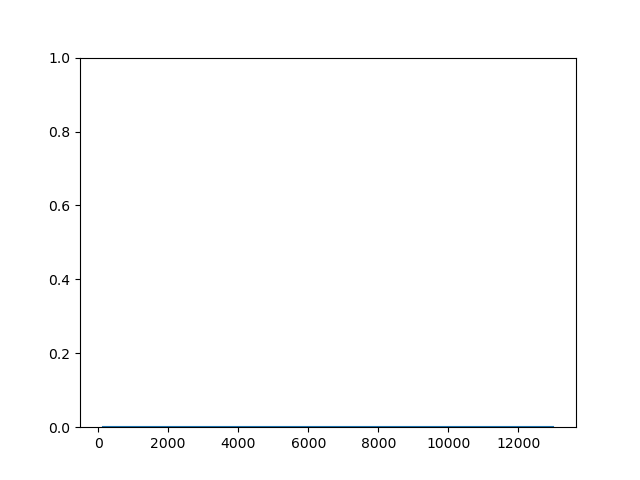

In [3]:
import matplotlib.animation as animation
import mpl_toolkits.axes_grid1
import matplotlib.widgets

lat_fig, lat_ax = plt.subplots()
lat_ax.set_ylim(0, 1)
x = np.sort(df['draft_model'].unique())

line, = lat_ax.plot(x, np.zeros(len(x)))

def animate(i):
    lat_ax.clear()
    df_i = df[df['prompt'] == i].sort_values(by=['draft_model'])
    lat_ax.plot(df_i['draft_model'], df_i['latency'], color='green', 
            label='original', marker='o')
    lat_ax.set_title(f"Prompt {i}")
    return line,

ani = animation.FuncAnimation(
    lat_fig, animate, frames=range(0,100,1), interval=1000, repeat=True, blit=True
)
plt.show()

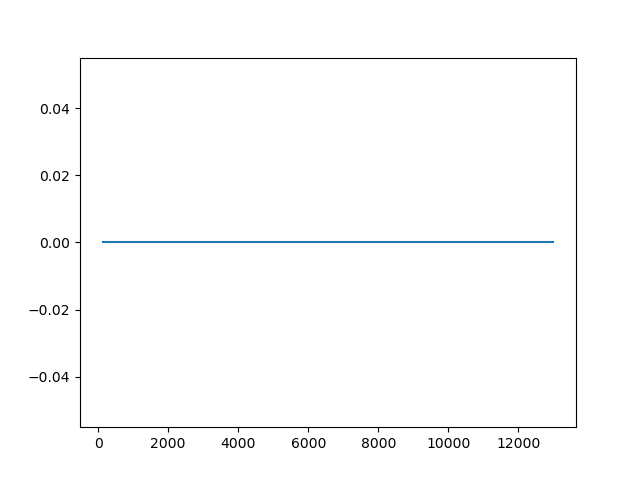

In [4]:
import matplotlib.animation as animation
import mpl_toolkits.axes_grid1
import matplotlib.widgets

t_fig, t_ax = plt.subplots()

x = np.sort(df['draft_model'].unique())

line, = t_ax.plot(x, np.zeros(len(x)))

def animate(i):
    t_ax.clear()
    df_i = df[df['prompt'] == i].sort_values(by=['draft_model'])
    t_ax.bar(df_i['draft_model'], df_i['verify_time'], df_i['draft_model'] * 0.5, color='r')
    t_ax.bar(df_i['draft_model'], df_i['draft_time'], df_i['draft_model'] * 0.5, bottom=df_i['verify_time'], color='b')
    t_ax.legend(['Verification Time', 'Draft Time'])

    t_ax.set_title(f"Prompt {i}")
    t_ax.set_xticks(df.draft_model.unique())
    t_ax.set_xscale('log')
    return line,

ani = animation.FuncAnimation(
    t_fig, animate, frames=range(0,100,1), interval=1000, repeat=True, blit=True
)
plt.show()


In [5]:
grouped = df.groupby(['draft_model'])
avg = grouped.mean()[['latency', 'tar', 'draft_time', 'verify_time']].reset_index()
avg

,draft_model,latency,tar,draft_time,verify_time
0,125,8.392866,0.279566,0.908922,7.087542
1,350,8.354311,0.339273,1.615644,6.385741
2,1300,6.650945,0.506106,1.264419,5.084377
3,2700,6.964296,0.515055,1.664482,4.988007
4,6700,8.980729,0.545887,3.720082,4.873519
5,13000,12.685974,0.572660,7.499838,4.730328


/data/shk148/miniconda3/lib/python3.12/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


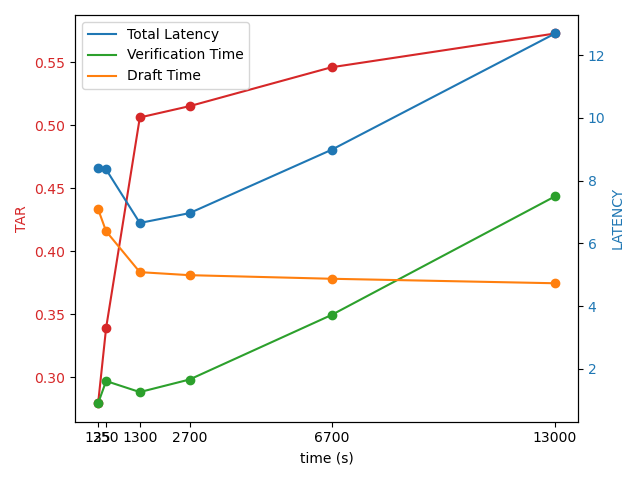

In [6]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('TAR', color=color)
ax1.plot(avg['draft_model'], avg['tar'], color=color)
ax1.scatter(avg['draft_model'], avg['tar'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
_ = ax1.set_xticks(df.draft_model.unique())
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('LATENCY', color=color)  # we already handled the x-label with ax1
ax2.plot(avg['draft_model'], avg['latency'], color=color)

ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(avg['draft_model'], avg['draft_time'], color='tab:green')

ax2.plot(avg['draft_model'], avg['verify_time'], color='tab:orange')
ax2.scatter(avg['draft_model'], avg['latency'], color=color)
ax2.scatter(avg['draft_model'], avg['draft_time'], color='tab:green')
ax2.scatter(avg['draft_model'], avg['verify_time'], color='tab:orange')

ax2.legend(['Total Latency','Verification Time', 'Draft Time'])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [7]:
# ax = plt.subplot(111)

# df.groupby('draft_model').plot(x='prompt', y='latency', ax=ax)
# L = plt.legend()
# _ = [plt.setp(item, 'text', T) for item, T in zip(L.texts, df.draft_model.unique())]
# plt.figure(figsize=(10,3))

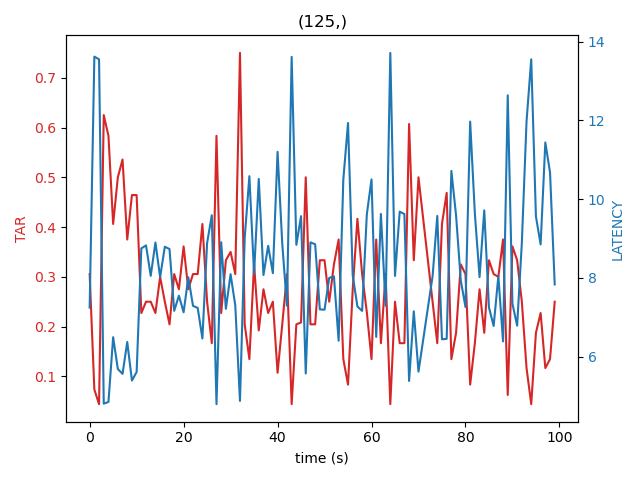

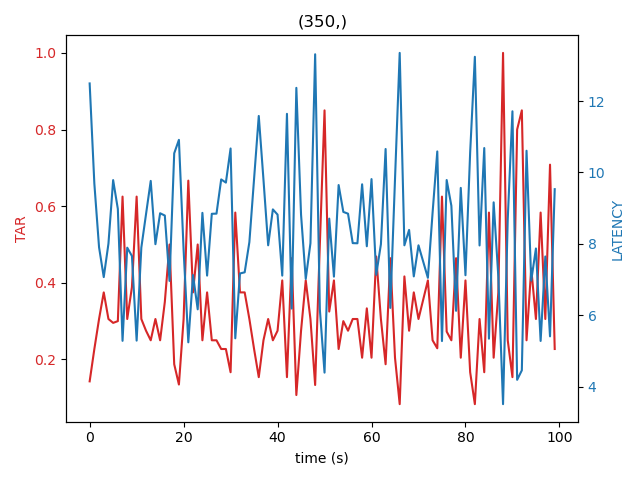

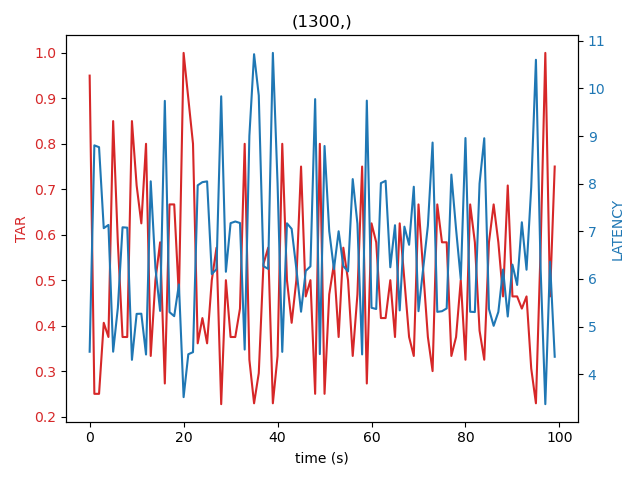

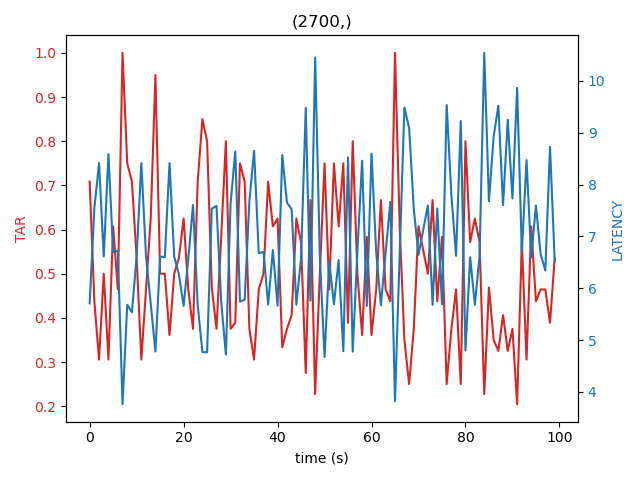

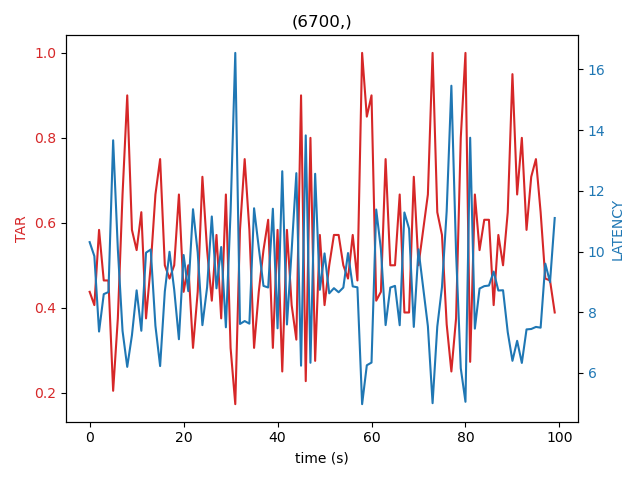

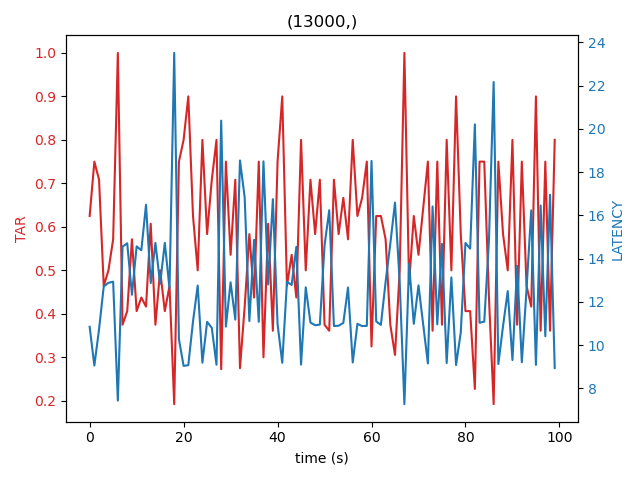

In [8]:
for name, group in grouped:

  fig, ax1 = plt.subplots()
  color = 'tab:red'
  ax1.set_title(name)
  ax1.set_xlabel('time (s)')
  ax1.set_ylabel('TAR', color=color)
  ax1.plot(group['prompt'], group['tar'], color=color)
  ax1.tick_params(axis='y', labelcolor=color)
  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:blue'
  ax2.set_ylabel('LATENCY', color=color)  # we already handled the x-label with ax1
  ax2.plot(group['prompt'], group['latency'], color=color)
  ax2.tick_params(axis='y', labelcolor=color)

  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  plt.show()


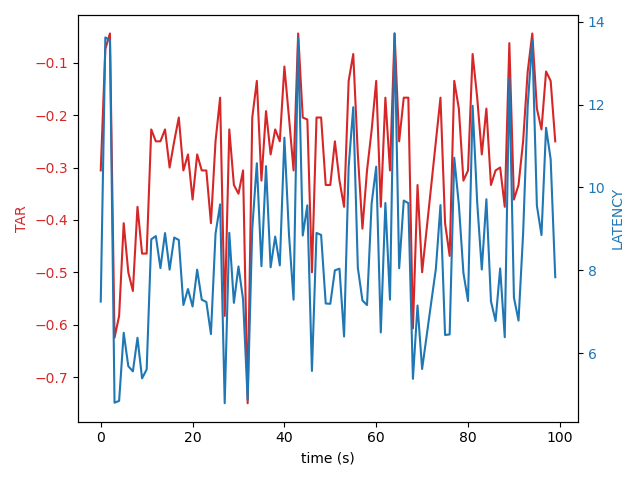

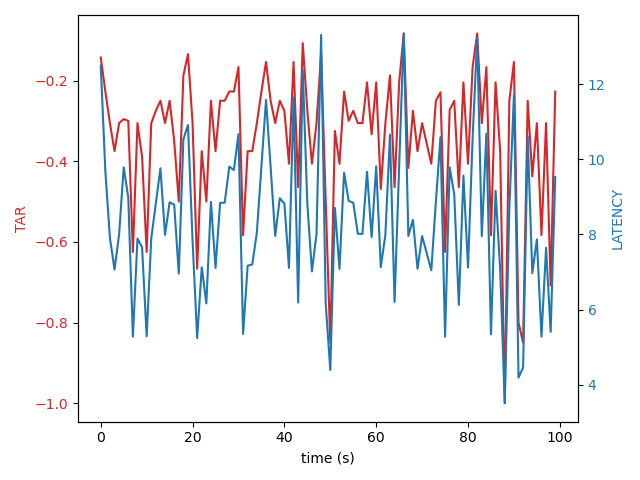

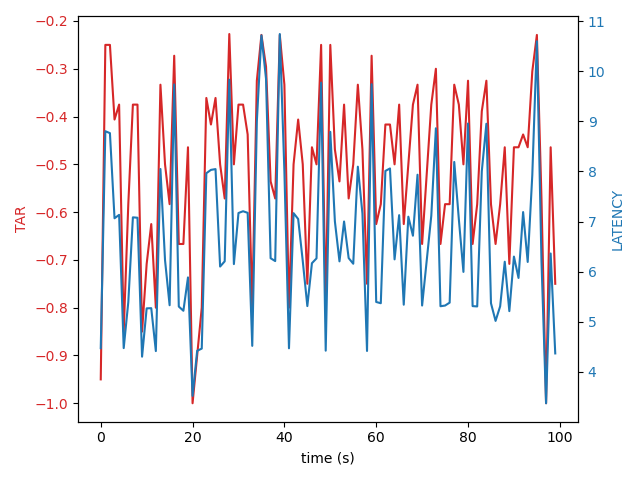

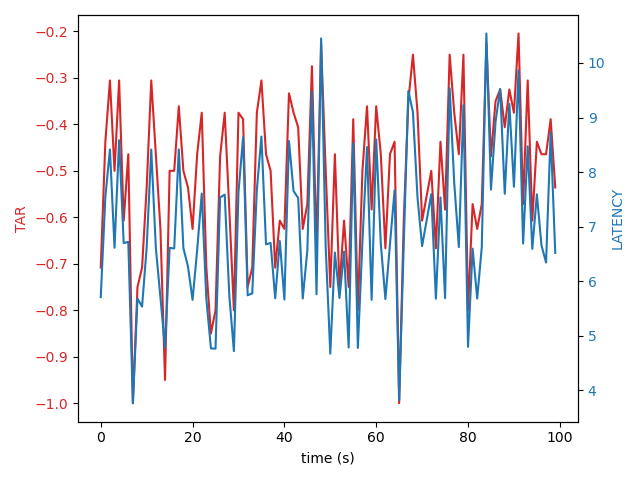

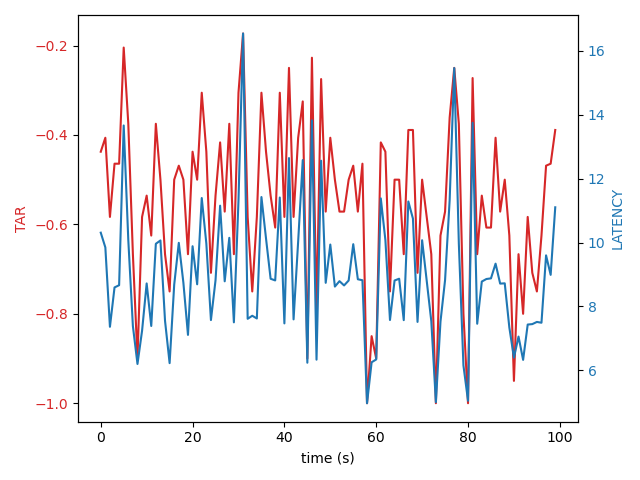

/tmp/ipykernel_438941/94461513.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax1 = plt.subplots()


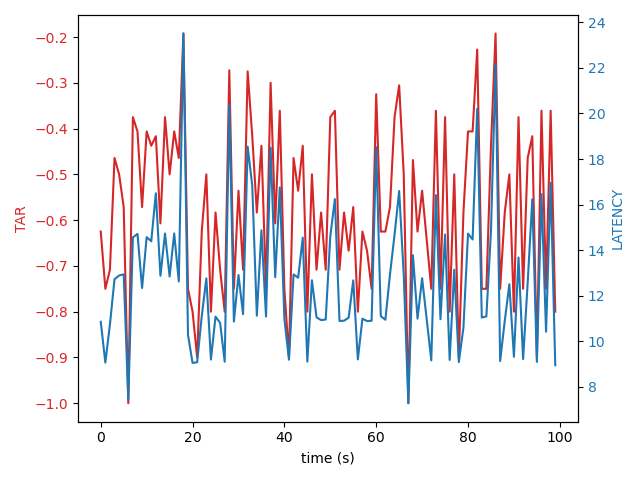

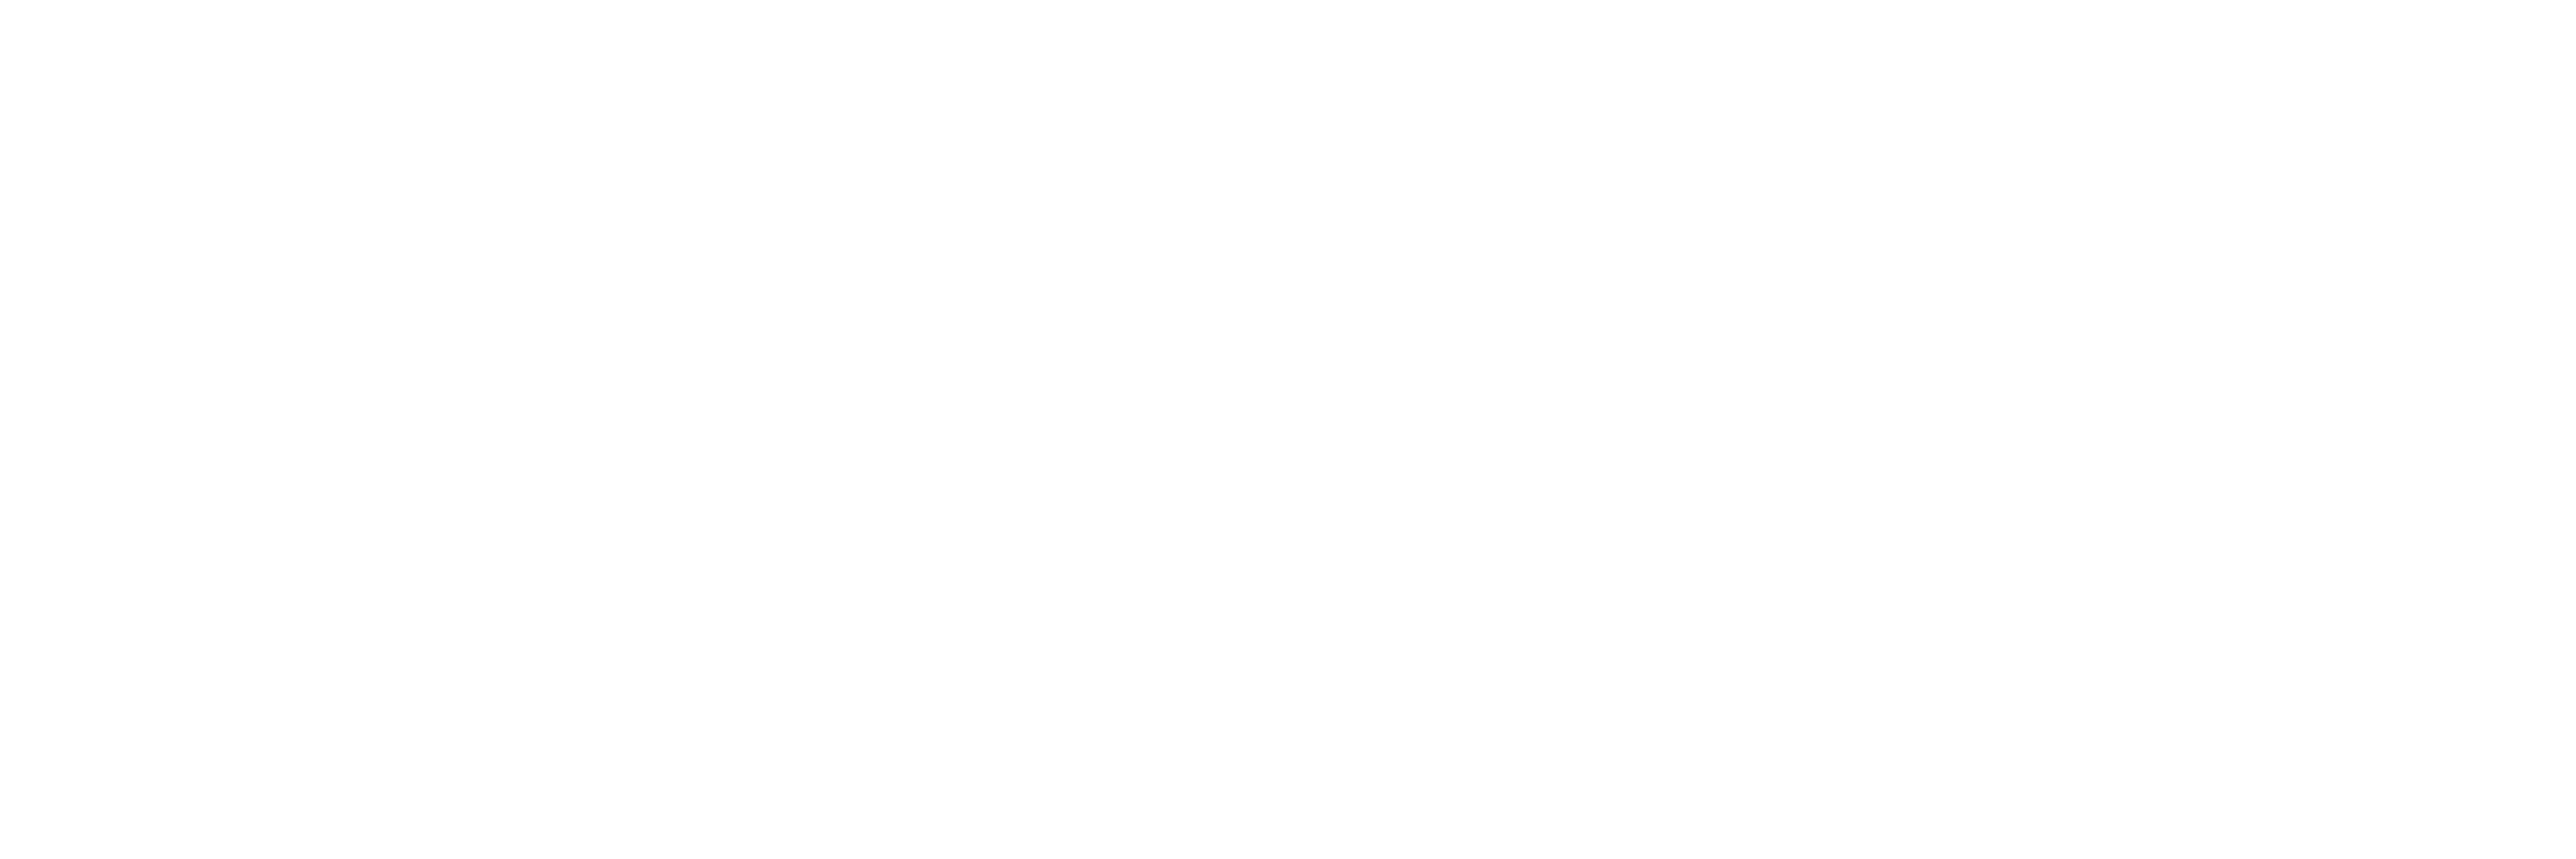

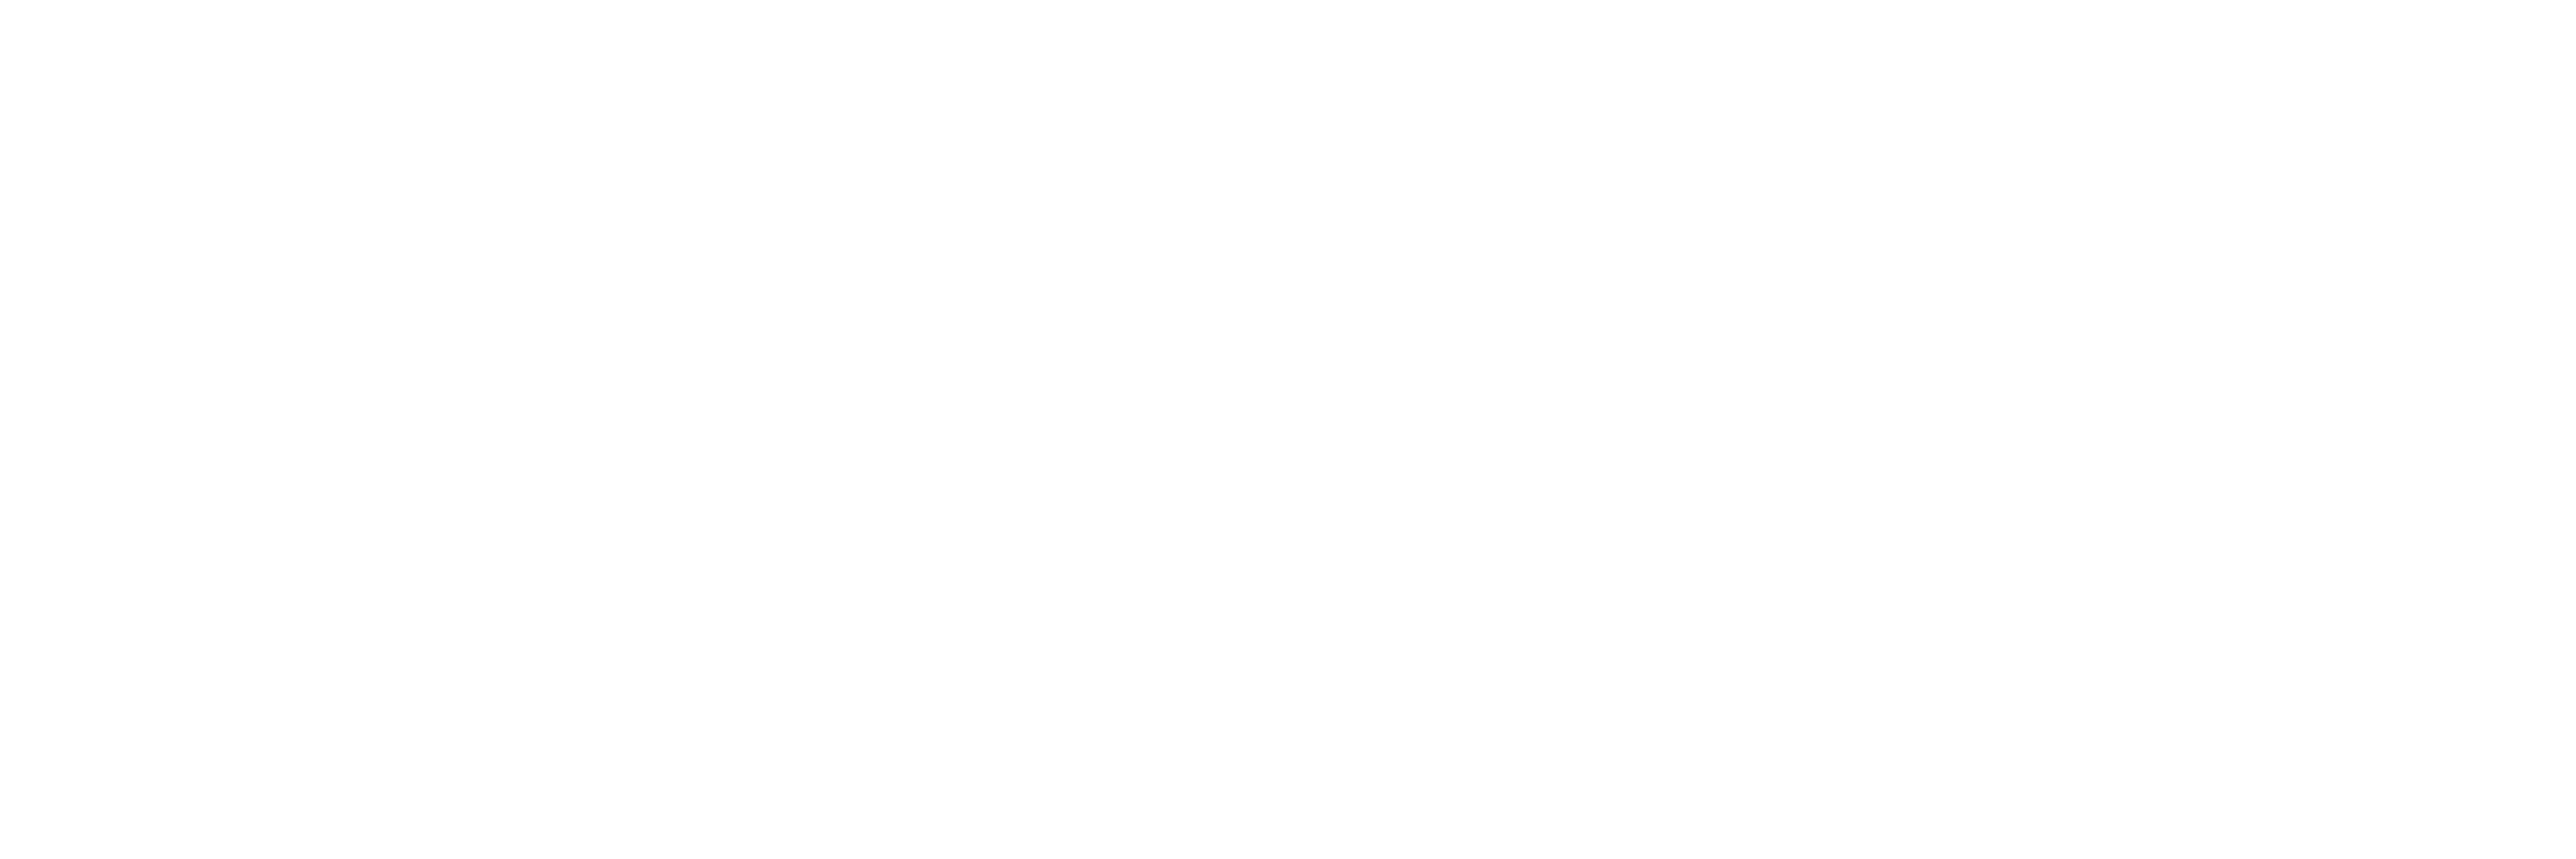

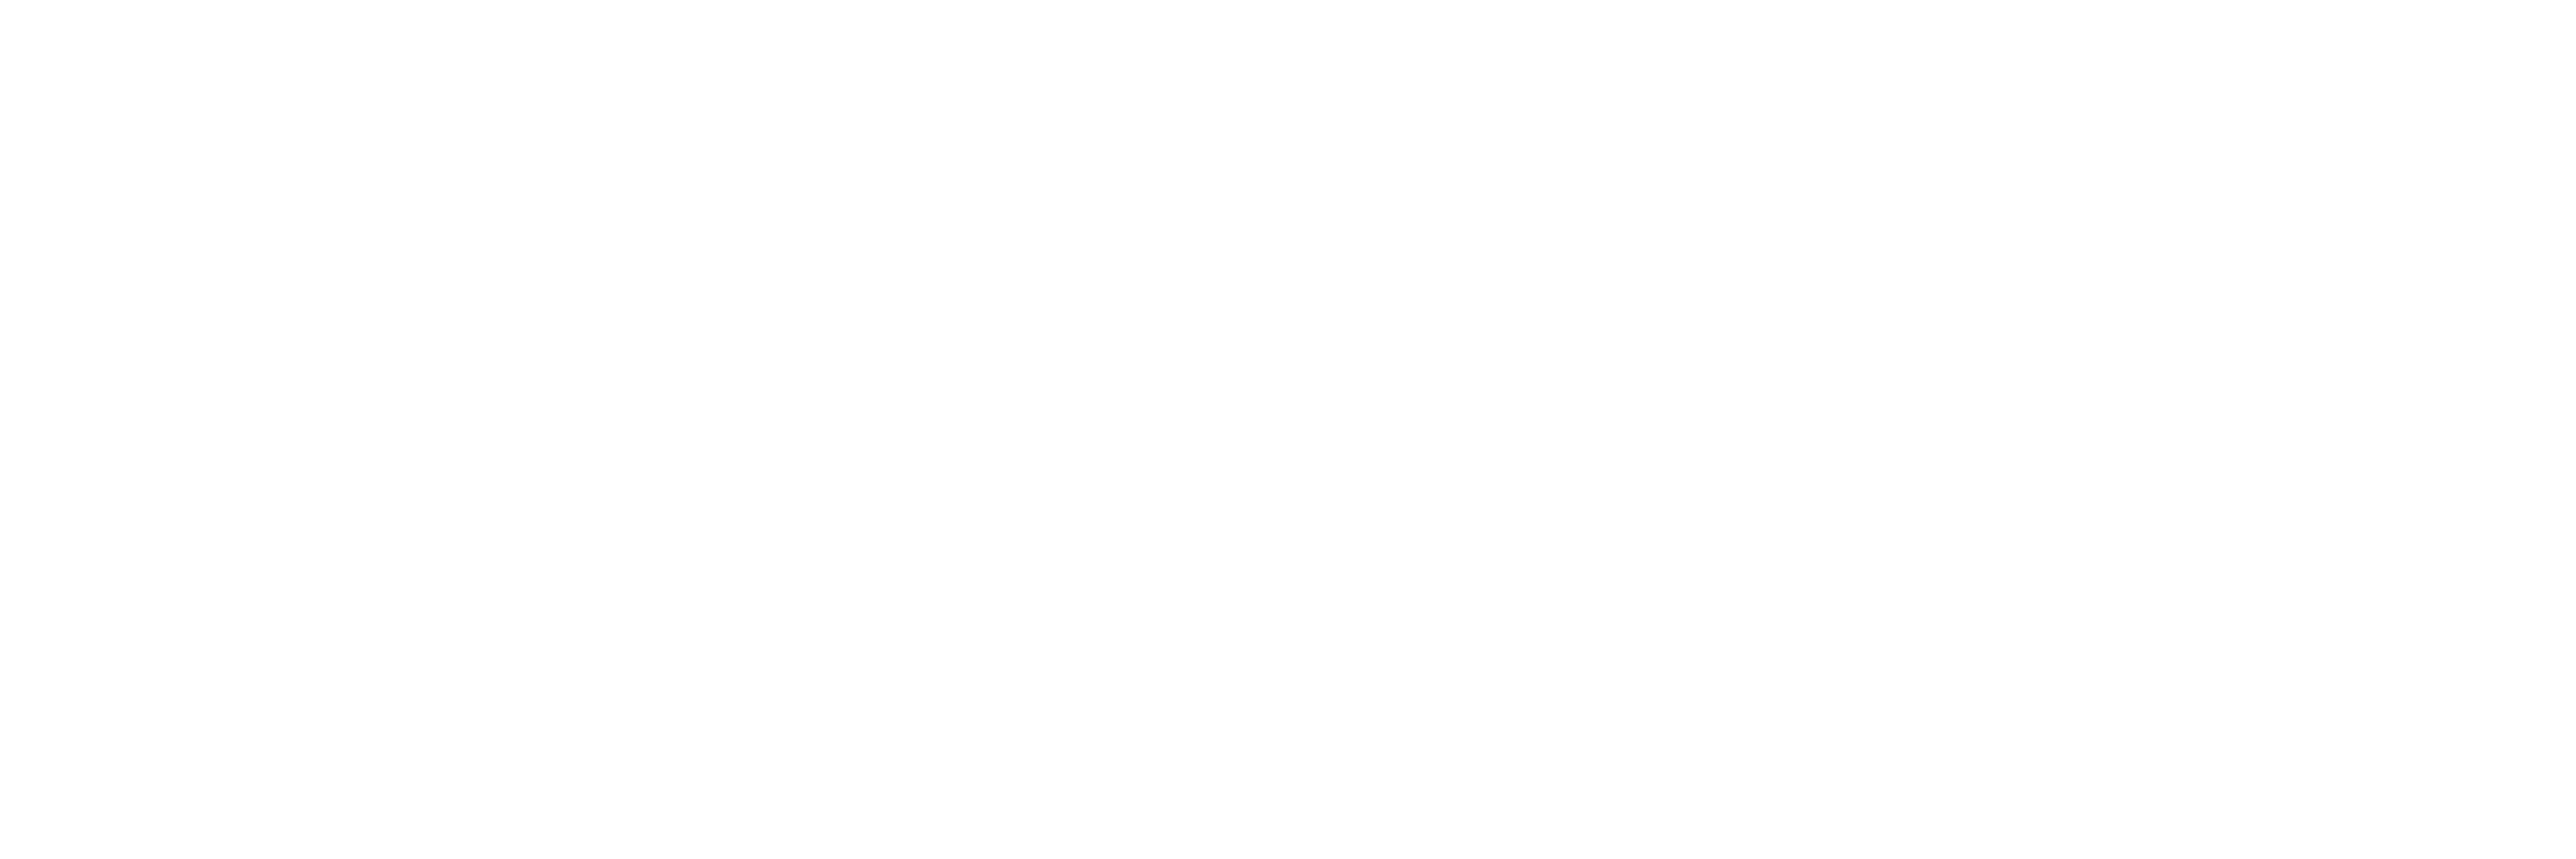

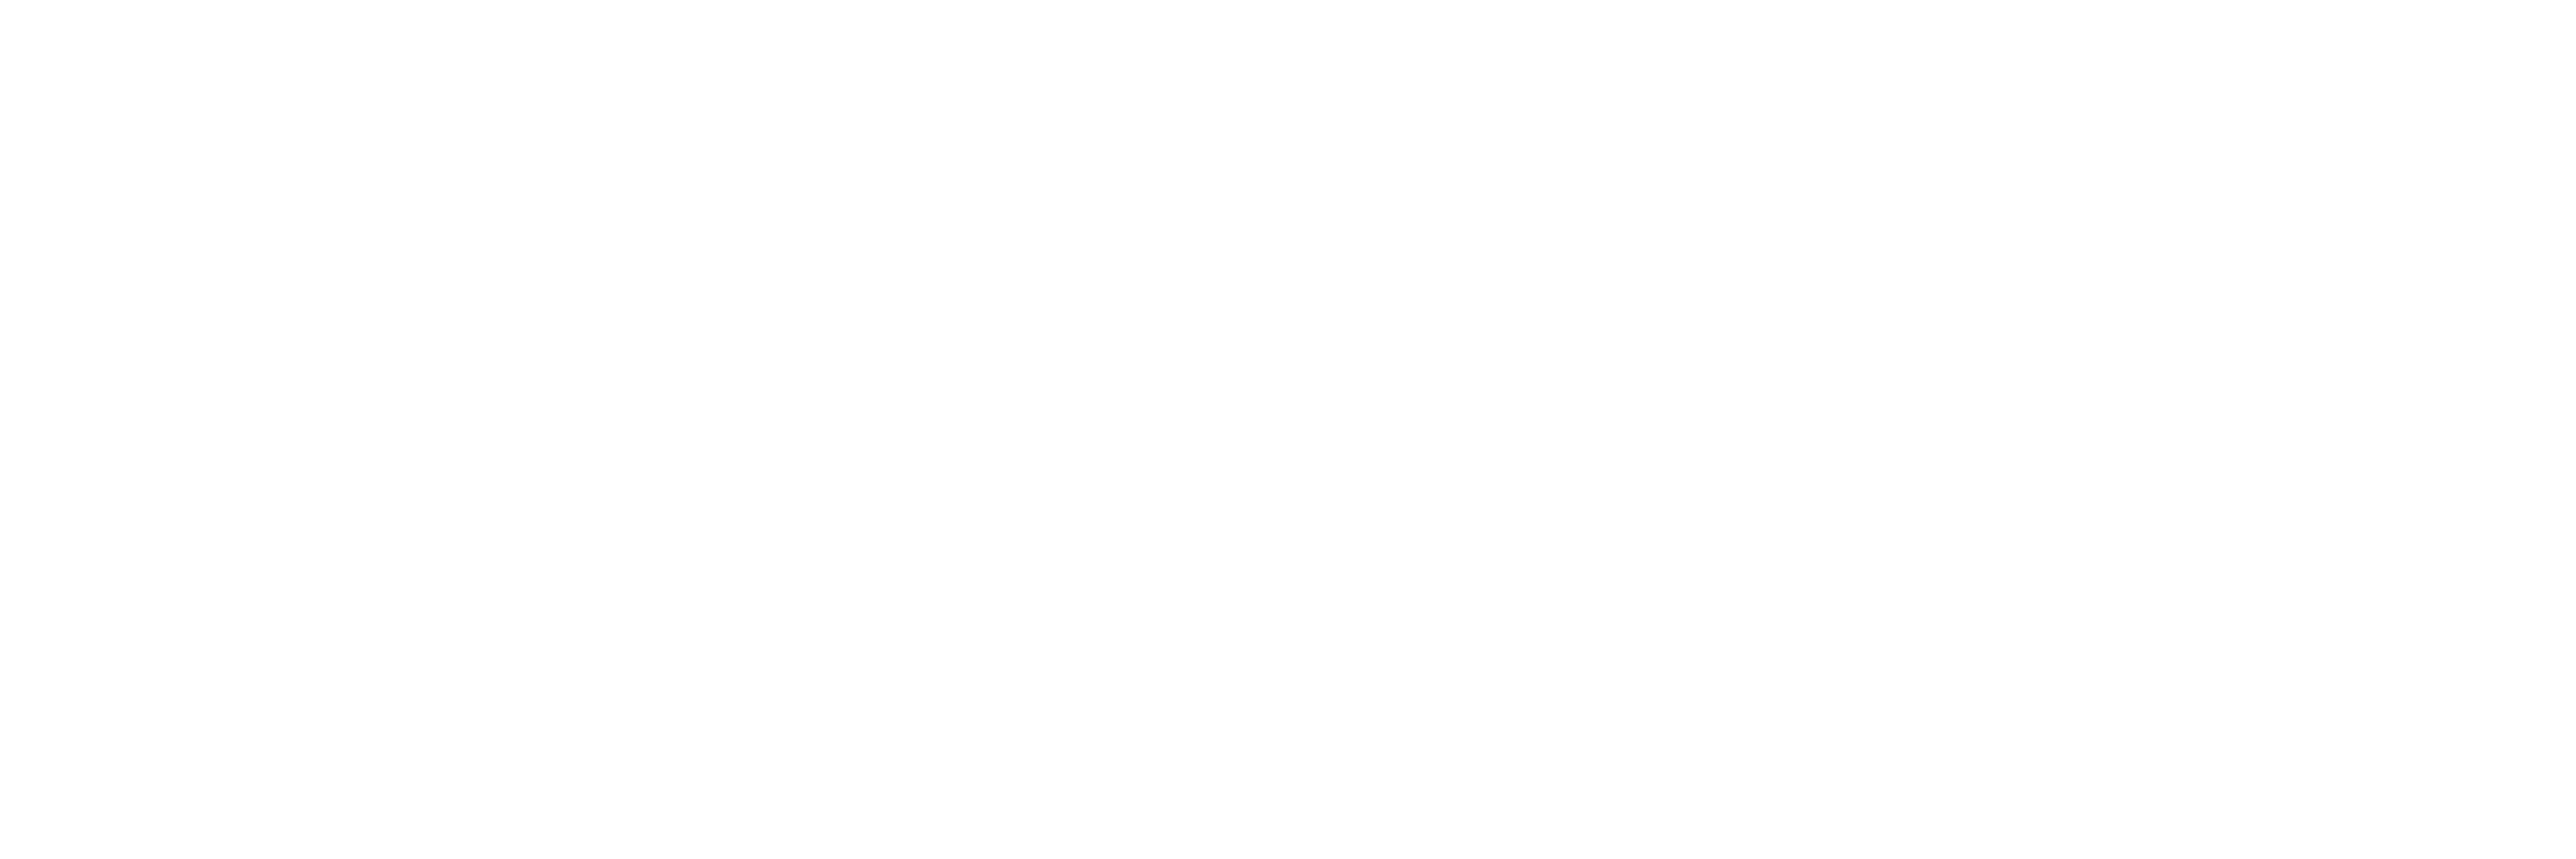

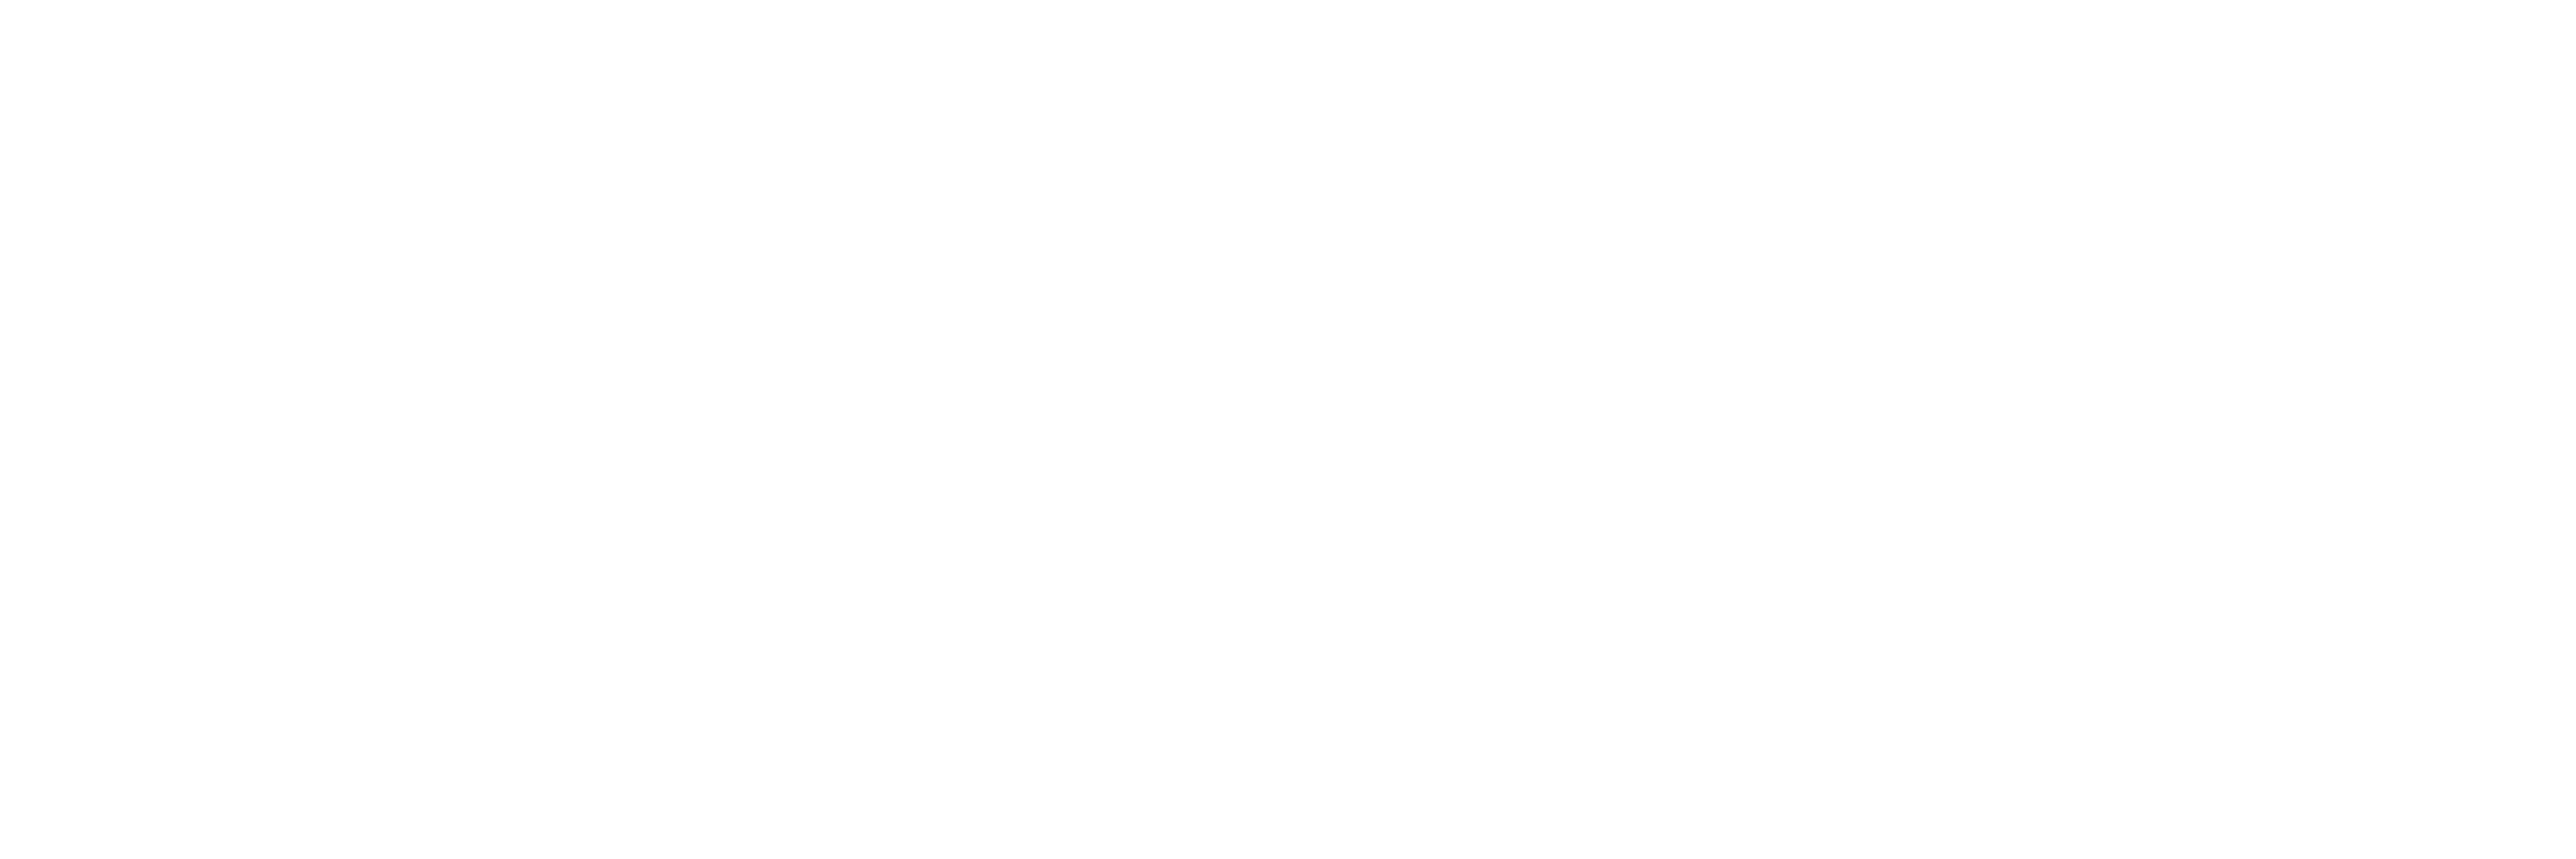

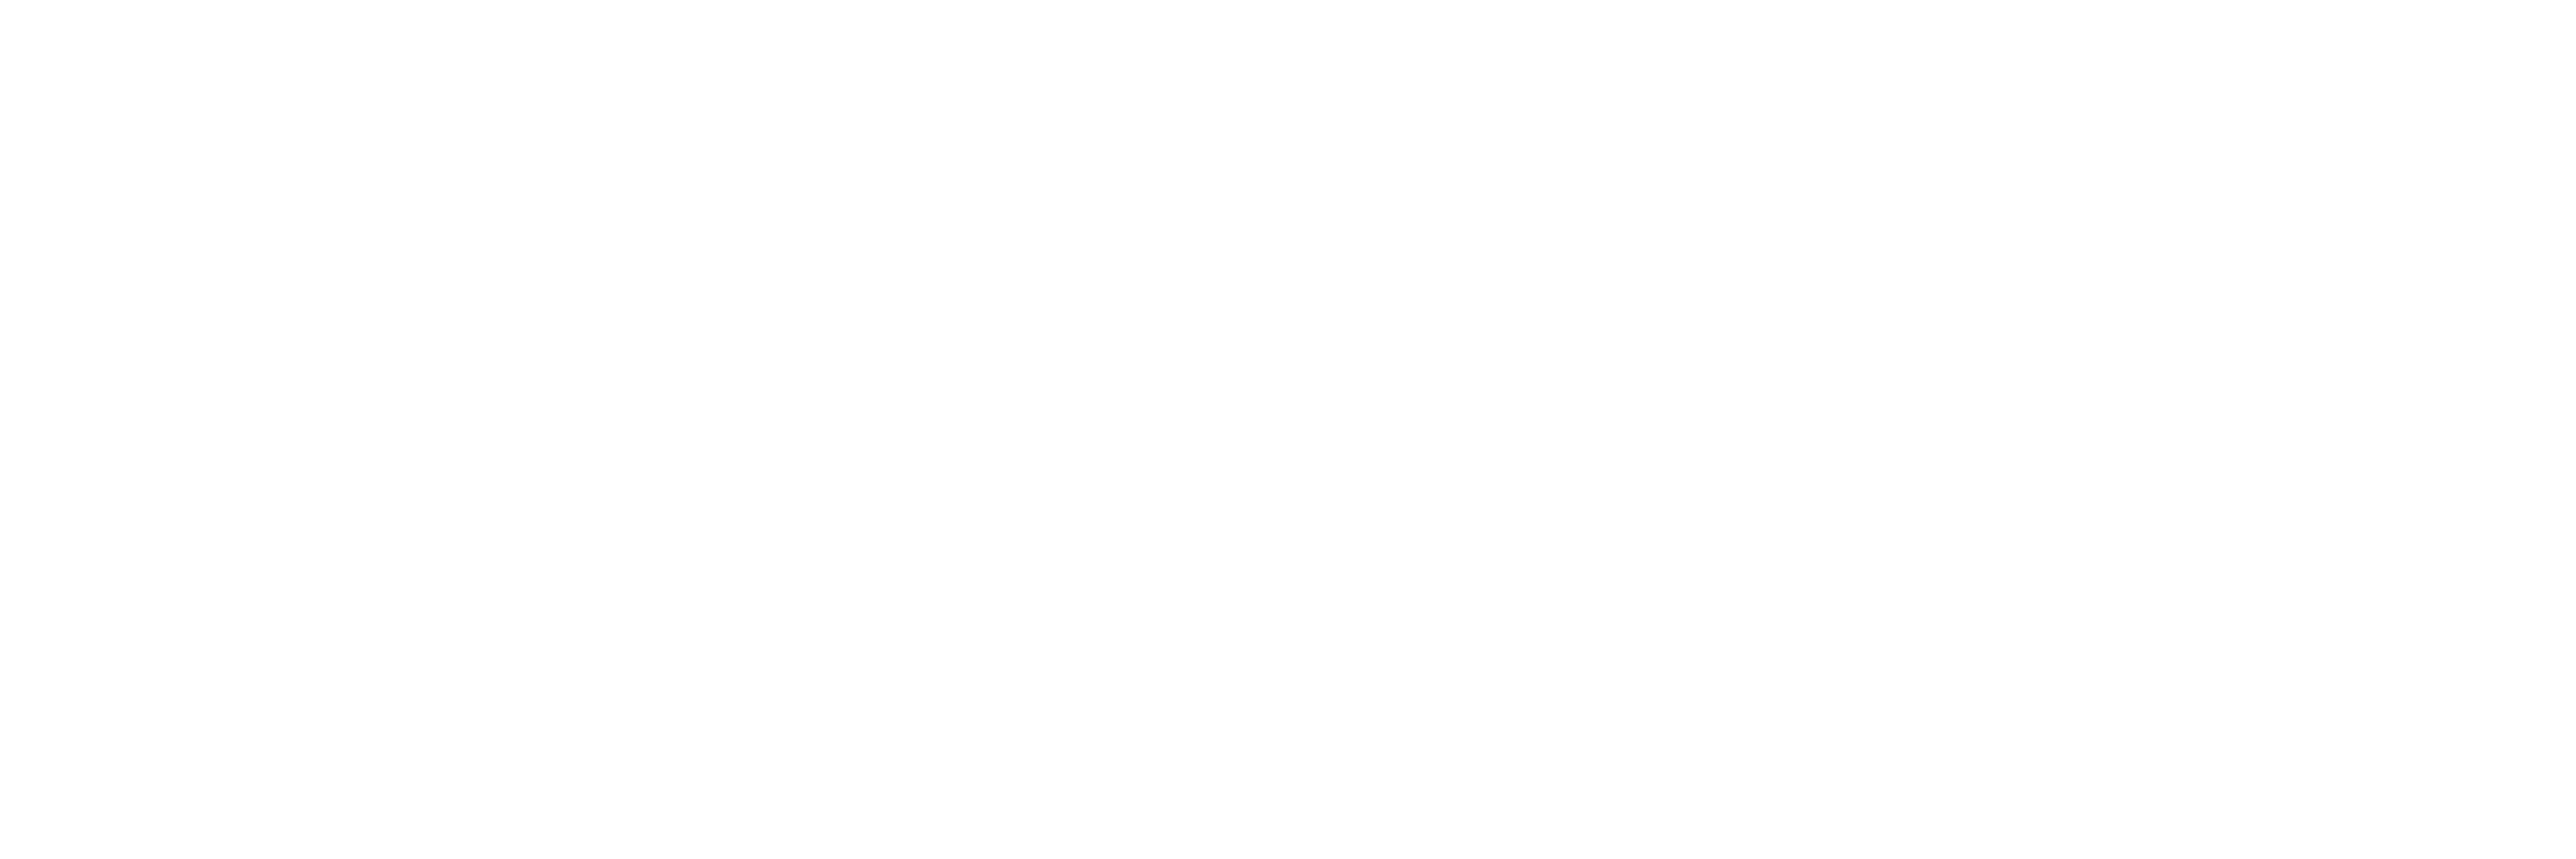

In [9]:
for name, group in grouped:
  plt.figure(figsize=(30, 10))
  fig, ax1 = plt.subplots()
  color = 'tab:red'
  ax1.set_xlabel('time (s)')
  ax1.set_ylabel('TAR', color=color)
  ax1.plot(group['prompt'], -1 * group['tar'], color=color)
  ax1.tick_params(axis='y', labelcolor=color)
  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:blue'
  ax2.set_ylabel('LATENCY', color=color)  # we already handled the x-label with ax1
  ax2.plot(group['prompt'], group['latency'], color=color)
  ax2.tick_params(axis='y', labelcolor=color)
  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  plt.show()
